WEEK-17

In [35]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [42]:
diabetes_df = pd.read_csv("A:\launch_code_STL\Final_Homework\week-13\diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier

#estimator=model
rf = RandomForestClassifier(n_estimators = 200, random_state=42)  #200 is reasonable

rf= rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7662337662337663

In [45]:
predictions=rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [46]:
print(rf.feature_importances_, X.columns)

[0.09291691 0.265229   0.08982683 0.07090504 0.07509956 0.15354422
 0.12056711 0.13191134] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [47]:
tree_10 = rf.estimators_[9]

In [25]:

import pydotplus
from sklearn import tree
from matplotlib import pyplot as plt

In [32]:
import matplotlib.pyplot as plt

# Plot the decision tree model
fig = plt.figure(figsize=(30,30))

# Plot the decision tree
fig = tree.plot_tree(tree_10,
              filled=True)

# Save figure
plt.savefig("tree10.svg", dpi=200)

# Display figure
plt.show()


AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

<Figure size 2160x2160 with 0 Axes>

In [31]:
tree.plot_tree(tree_10, filled=True)
plt.savefig("tree.svg")
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

In [48]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:23:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       150
           1       0.64      0.56      0.60        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
print(auc)

0.6944444444444444


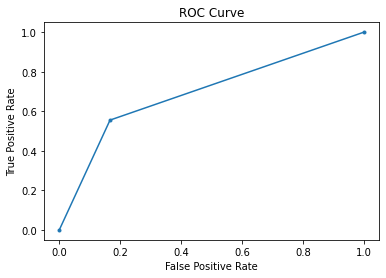

In [50]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [51]:
#precisison recall curve 

from sklearn.metrics import precision_recall_curve, f1_score, auc


precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print(f1)

0.5960264900662252


In [52]:
pr_auc = auc(recall, precision)
pr_auc

0.6771284271284271

Text(0, 0.5, 'Precision')

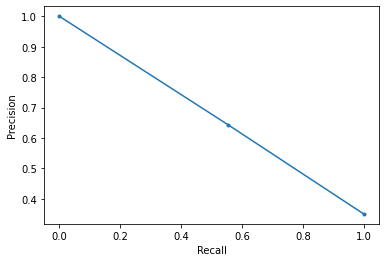

In [53]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')